In [1]:
from psikit import Psikit

In [2]:
pk=Psikit(debug=True,threads=1,memory=12)


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.


In [3]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sys.path.append('/home/lz2826/comp-lab-class/Week11/')

In [4]:
pk.read_from_smiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

In [5]:
pk.optimize()

Optimizer: Optimization complete!


-676.3571175887204

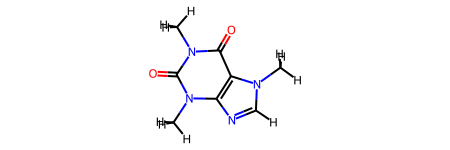

In [20]:
pk.mol

In [21]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.20126228  0.0705364   0.08506012 -0.47140684  0.12577581 -0.10083292
  0.3640934  -0.49600873 -0.04595338  0.36252452 -0.52858779  0.02500877
  0.00605368 -0.03375568  0.11036605  0.11036605  0.11036605  0.17305132
  0.05004313  0.05004313  0.05004313  0.06149202  0.06149202  0.06149202]
[-0.11403968 -0.6938716   0.38640967 -0.62283959  0.63497364  0.09325935
  0.89978894 -0.63014388 -0.87904356  1.09566894 -0.6272439  -0.87749695
 -0.12040863 -0.12349377  0.12973197  0.16727751  0.16726886  0.18241285
  0.16750556  0.14895415  0.14892454  0.14560138  0.14560937  0.17519482]
[-0.13210091 -0.05233705  0.0773483  -0.27543954  0.13961215 -0.12549866
  0.2939429  -0.39450056 -0.18830337  0.34848003 -0.398579   -0.15250986
 -0.13202201 -0.13825365  0.1040491   0.1167594   0.11778365  0.12133841
  0.11931941  0.10841307  0.10770435  0.10710538  0.10597684  0.12171161]


In [22]:
mol = pk.mol
atoms = mol.GetAtoms()

In [23]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [24]:
df = pd.DataFrame(data)
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.201,-0.114,-0.132
1,N,0.071,-0.694,-0.052
2,C,0.085,0.386,0.077
3,N,-0.471,-0.623,-0.275
4,C,0.126,0.635,0.140
5,C,-0.101,0.093,-0.125
6,C,0.364,0.900,0.294
7,O,-0.496,-0.630,-0.395
8,N,-0.046,-0.879,-0.188
9,C,0.363,1.096,0.348


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
plt.style.use('ggplot')

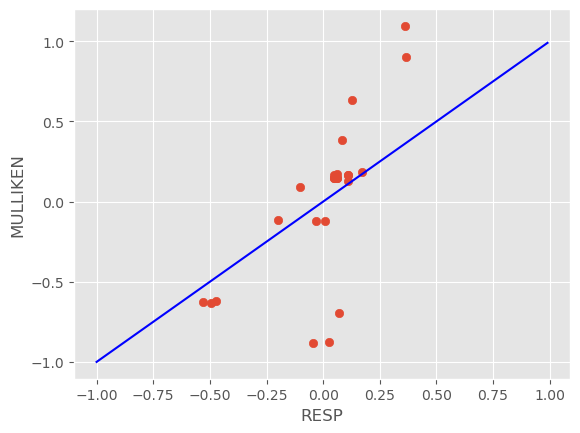

In [27]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

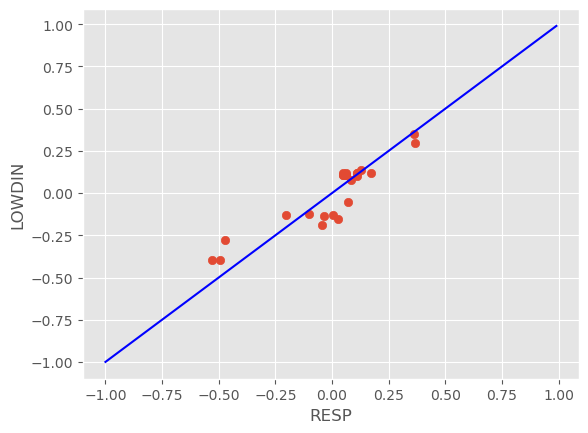

In [28]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

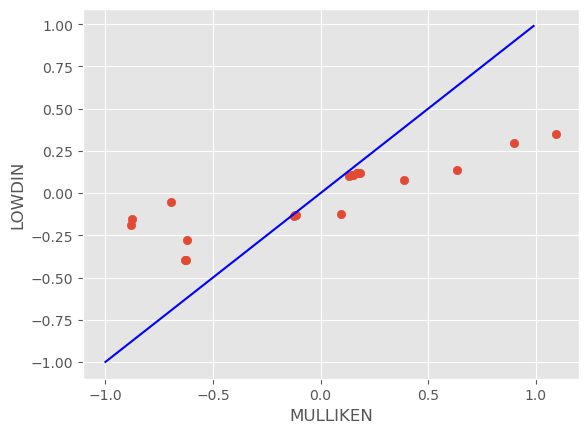

In [29]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

In [30]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

In [31]:
for at in mol.GetAtoms():
    lbl = '%.2f'%(at.GetDoubleProp("RESP"))
    at.SetProp('atomNote',lbl)

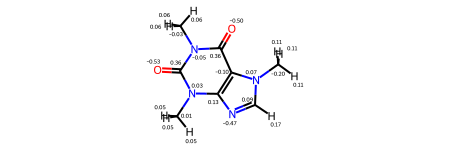

In [32]:
mol